In [120]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

In [5]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [153]:
data.info()
data.dropna(axis=0,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Demographics Pie Charts

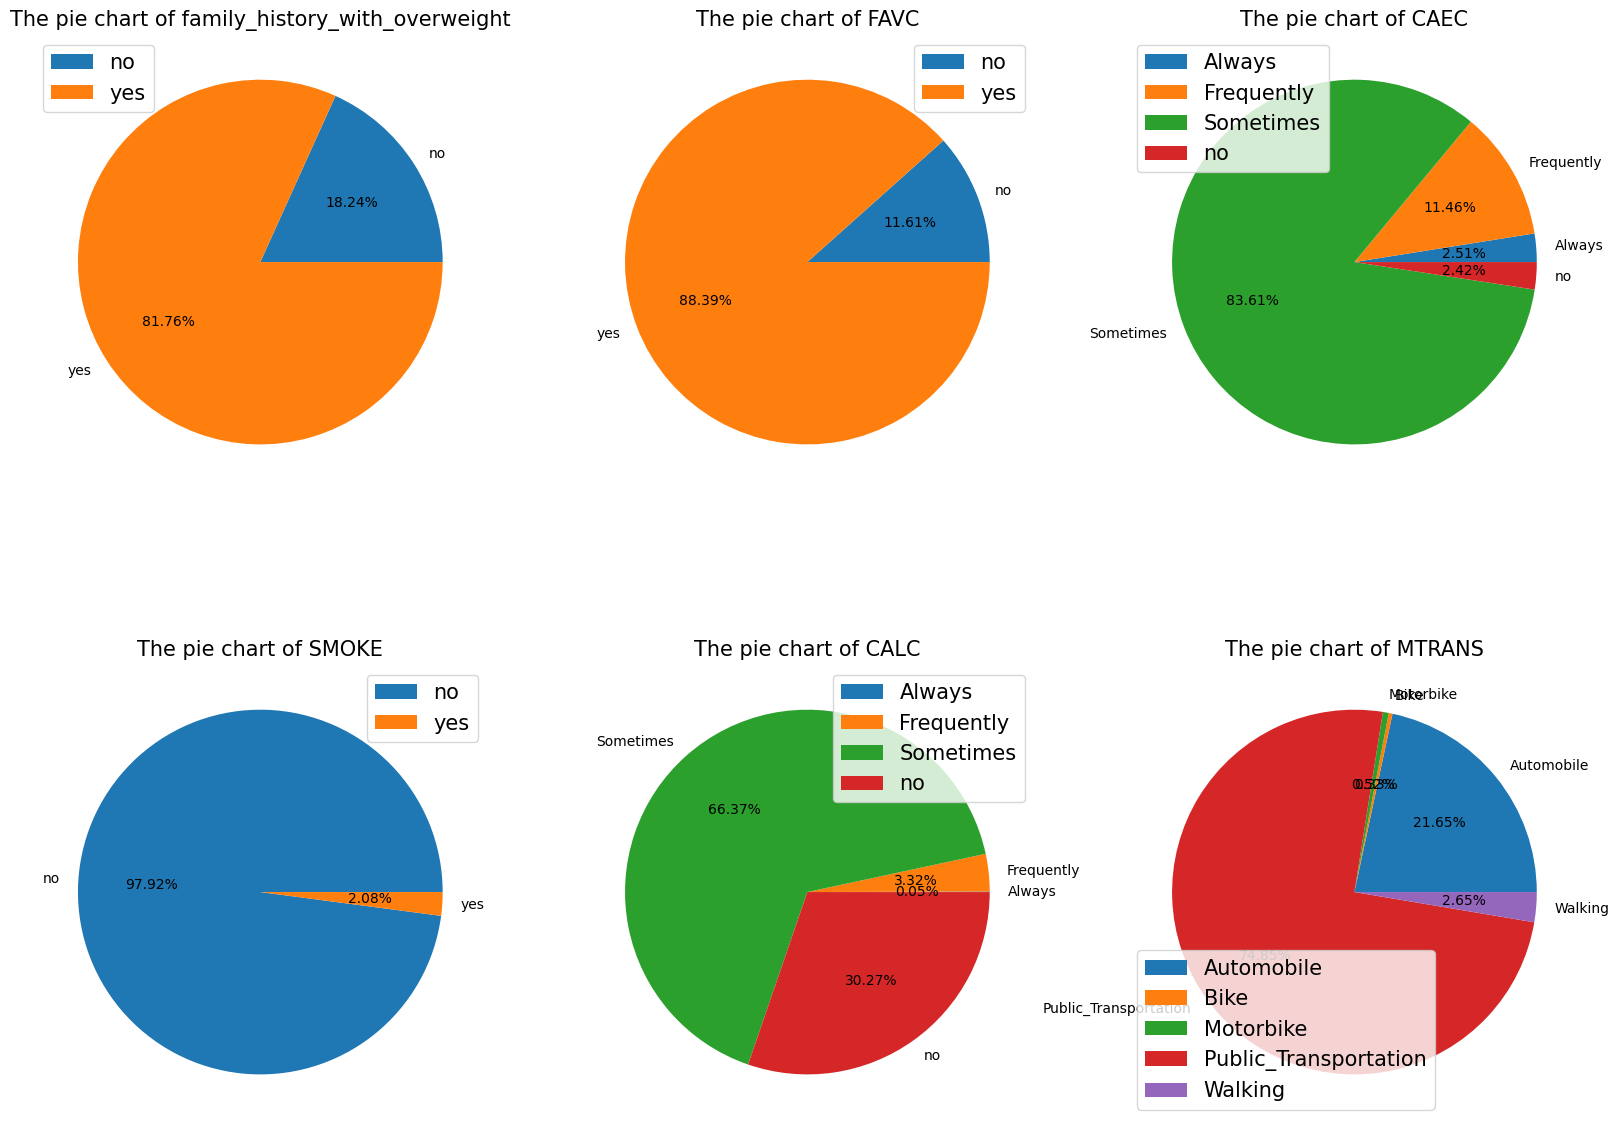

In [42]:
columns = ["family_history_with_overweight","FAVC","CAEC","SMOKE","CALC","MTRANS"]
plt.figure(figsize = (20,15))
for i in range(len(columns)):
    plt.subplot(2,3,i+1)
    data_item = data.groupby(columns[i]).count().reset_index()
    plt.pie(data_item["NObeyesdad"], autopct = '%.2f%%', labels = data_item[columns[i]])
    plt.legend(fontsize = 15)
    plt.title(f"The pie chart of {columns[i]}", fontsize = 15)
plt.show()

### The relationship between obesity and alcohol consumption Count Plot

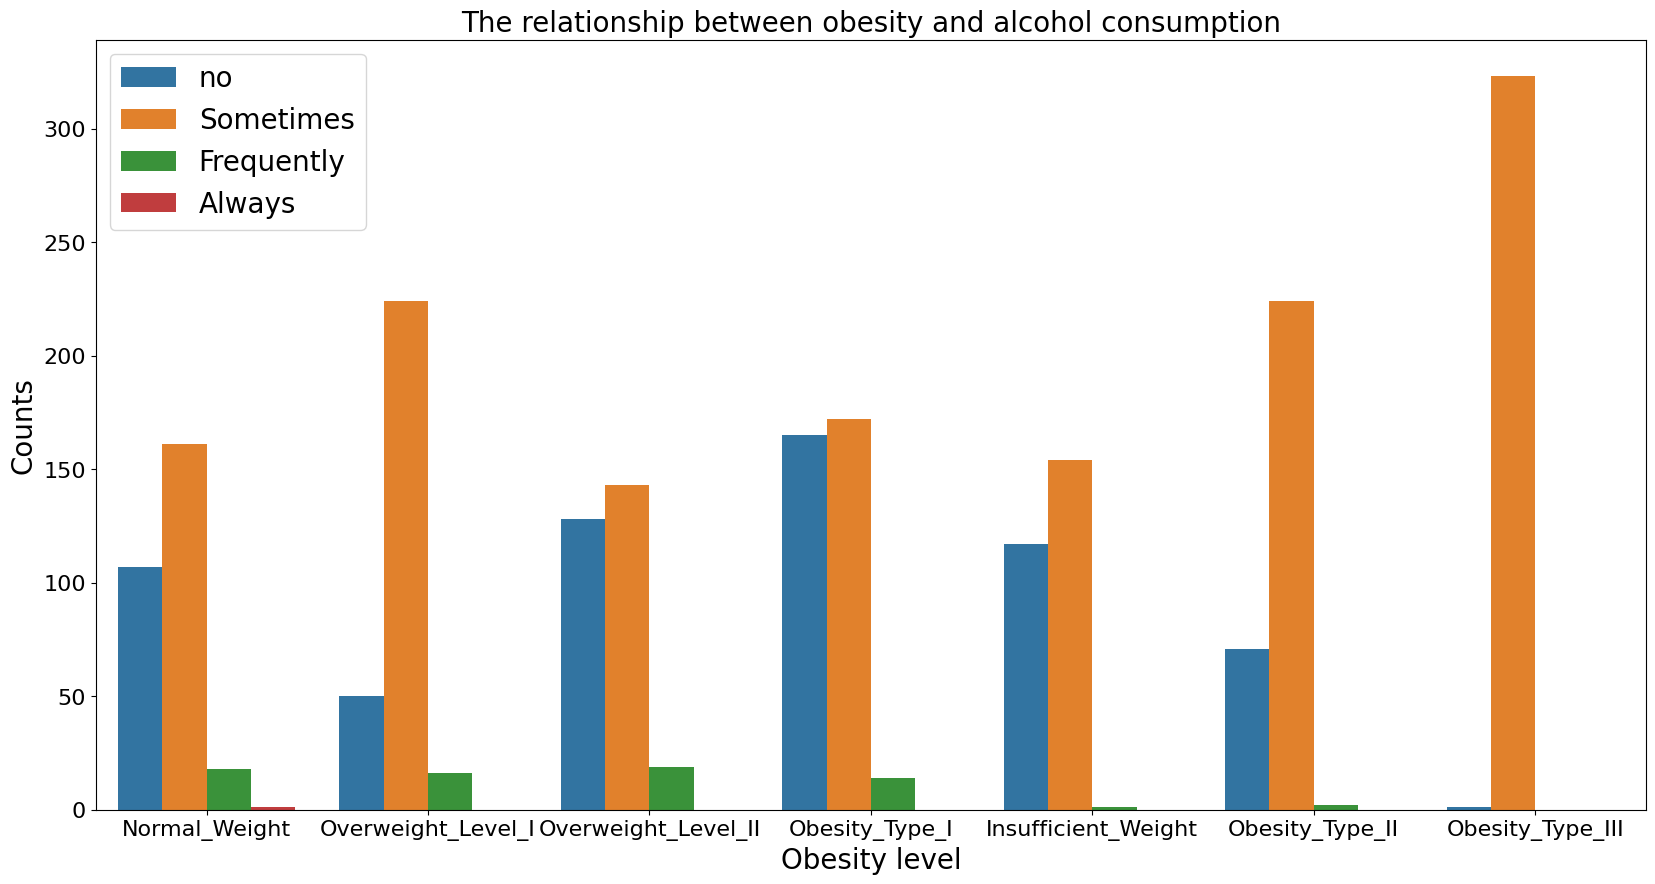

In [69]:
plt.figure(figsize = (20,10))
sns.countplot(x = "NObeyesdad", data = data, hue = "CALC")
plt.title("The relationship between obesity and alcohol consumption", fontsize = 20)
plt.legend(fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Obesity level", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.show()

### The relationship between obesity and gender Count Plot

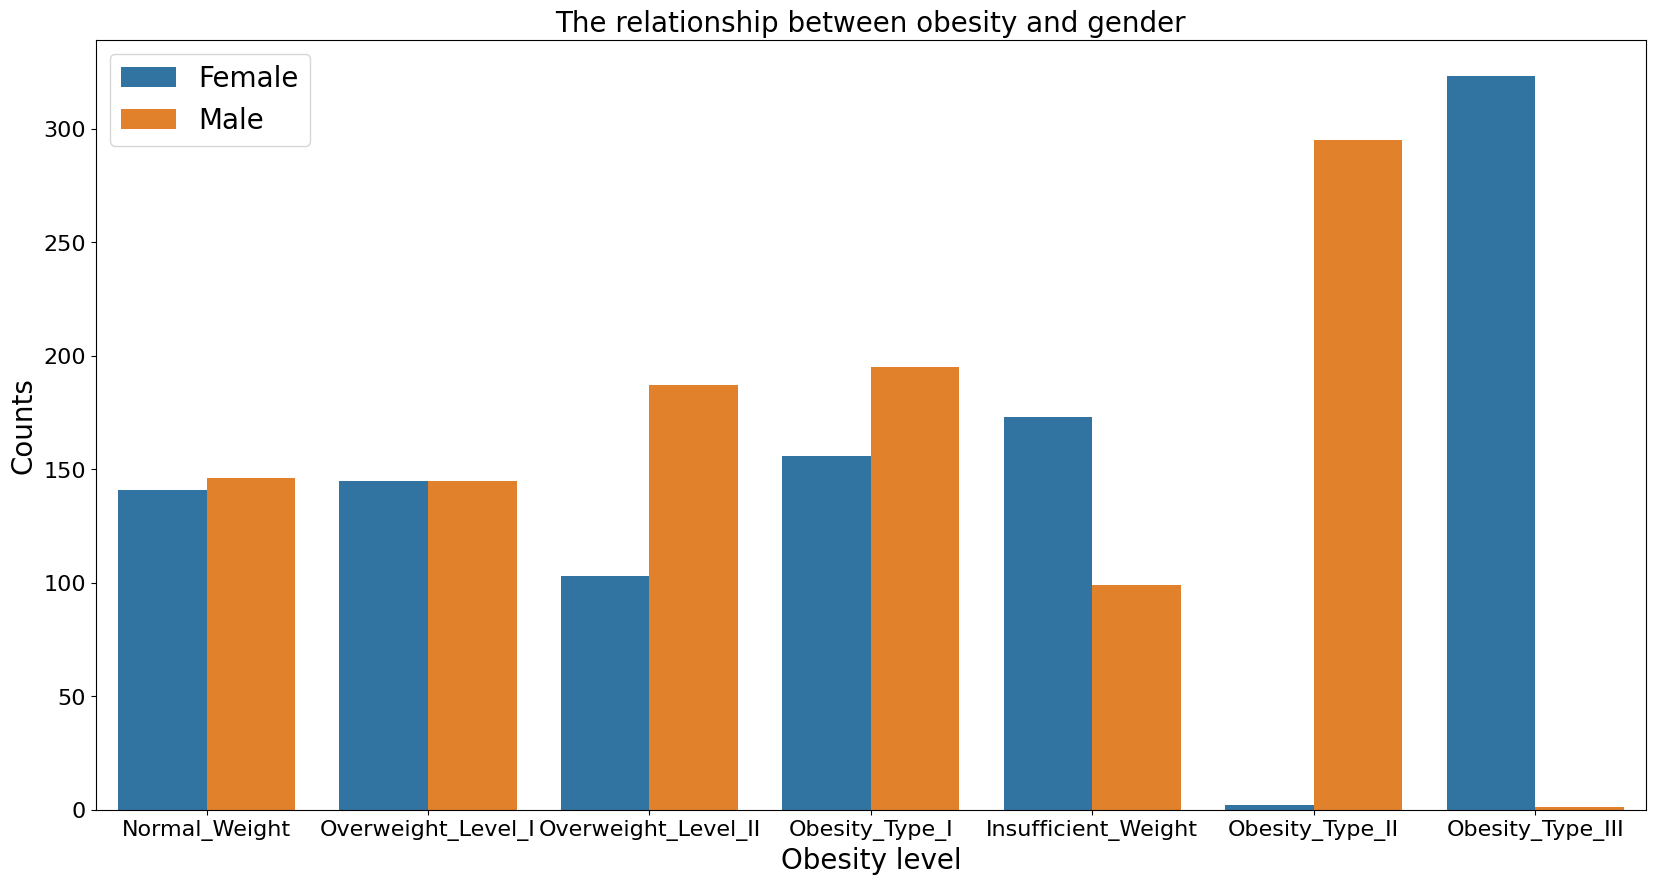

In [70]:
plt.figure(figsize = (20,10))
sns.countplot(x = "NObeyesdad", data = data, hue = "Gender")
plt.title("The relationship between obesity and gender",fontsize=20)
plt.legend(fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Obesity level", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.show()

### Demographics Distribution Histograms

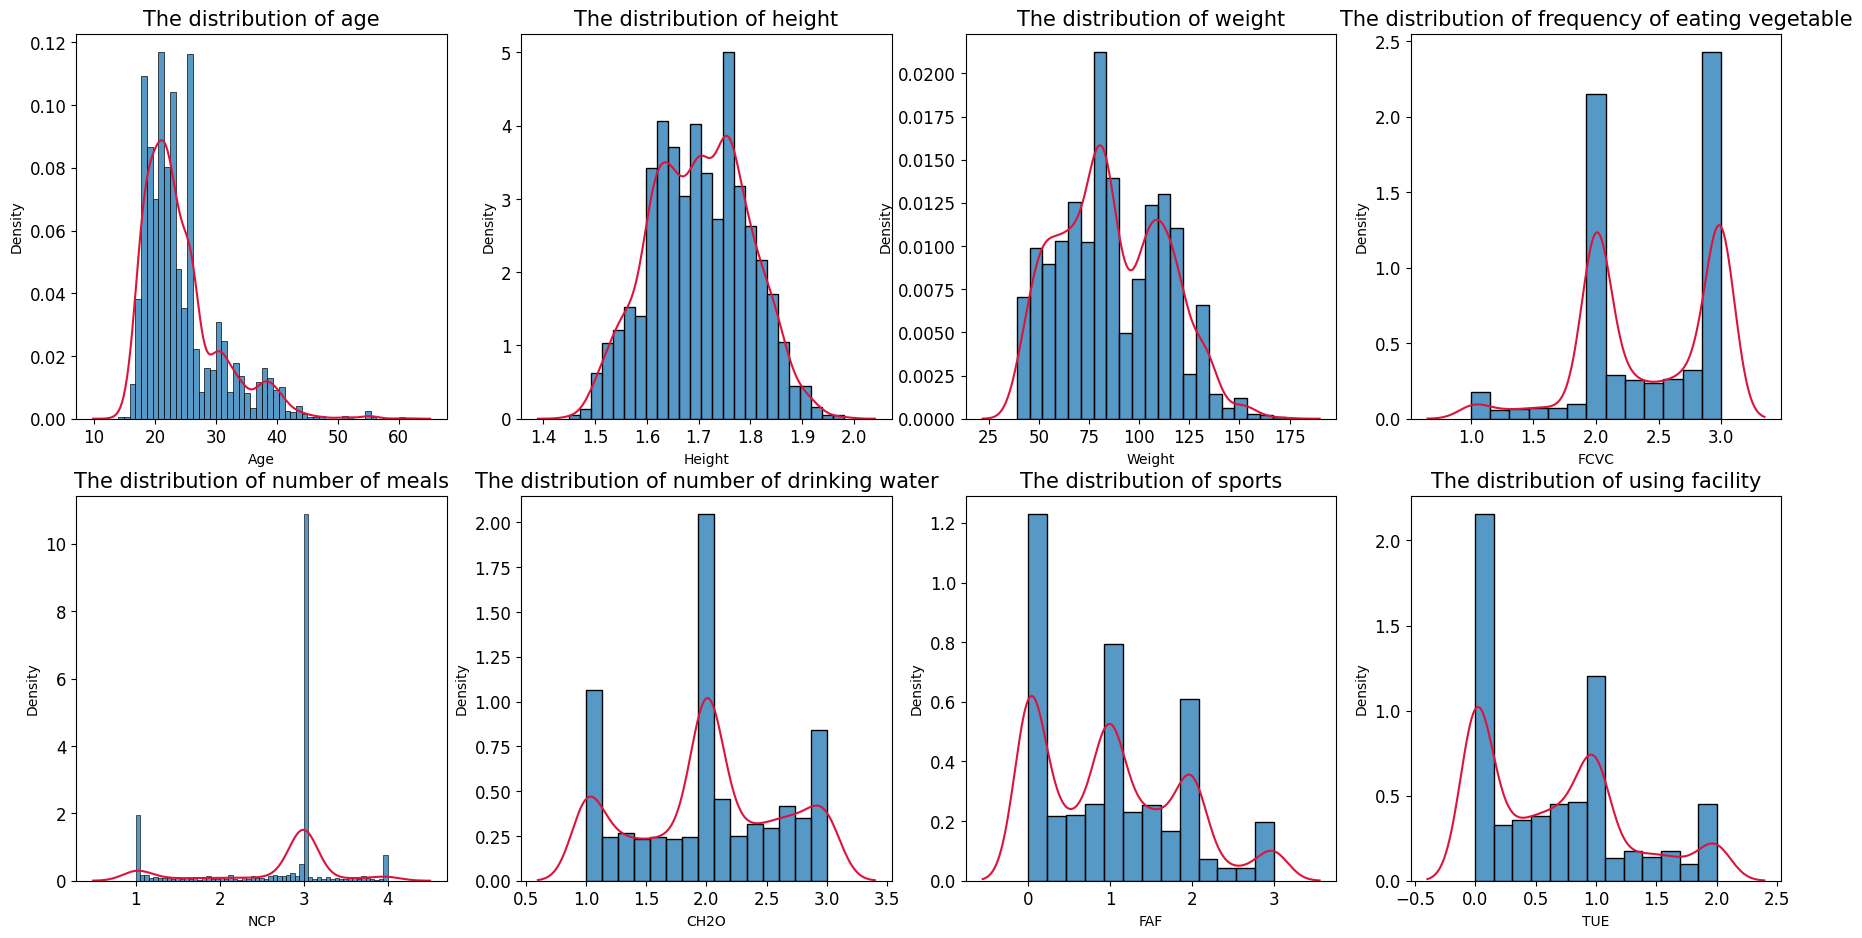

In [75]:
plt.figure(figsize = (22,11))
columns = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
column_names = ["age","height","weight","frequency of eating vegetable","number of meals","number of drinking water","sports","using facility"]
for i in range(len(columns)):
    plt.subplot(2,4,1+i)
    ax = sns.histplot(data[columns[i]], kde = False, stat = 'density')
    sns.kdeplot(data[columns[i]], color = 'crimson', ax = ax)
    plt.title(f"The distribution of {column_names[i]}", fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
#     plt.xlabel(fontsize = 12)
#     plt.ylabel(fontsize = 12)
plt.show()

### Heatmap

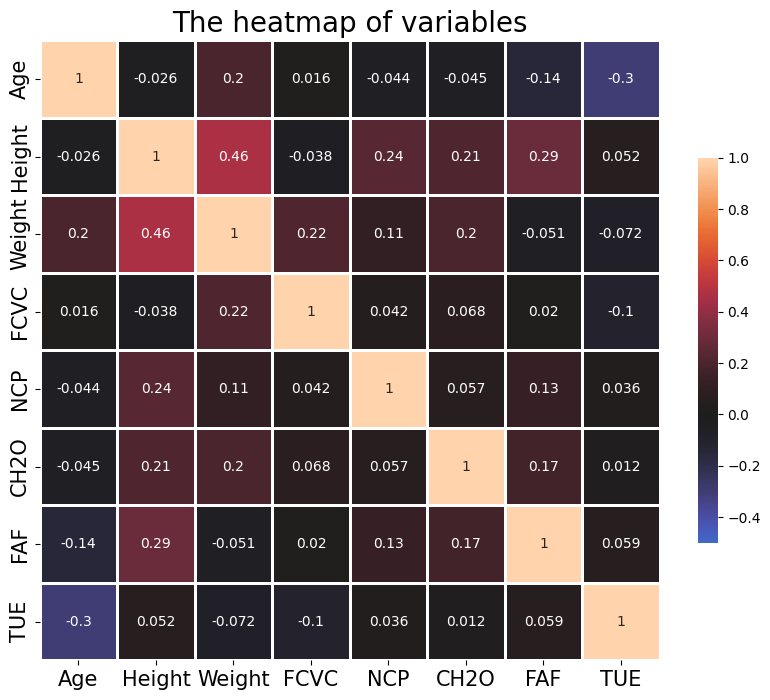

In [96]:
data_heat = data[["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]]
corr = data_heat.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, vmin = -0.5, vmax = 1, annot = True, center = 0, square = True, linewidths = 0.8, cbar_kws = {"shrink":0.5})
plt.title("The heatmap of variables", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### PCA Scatter Plot on Obesity Levels

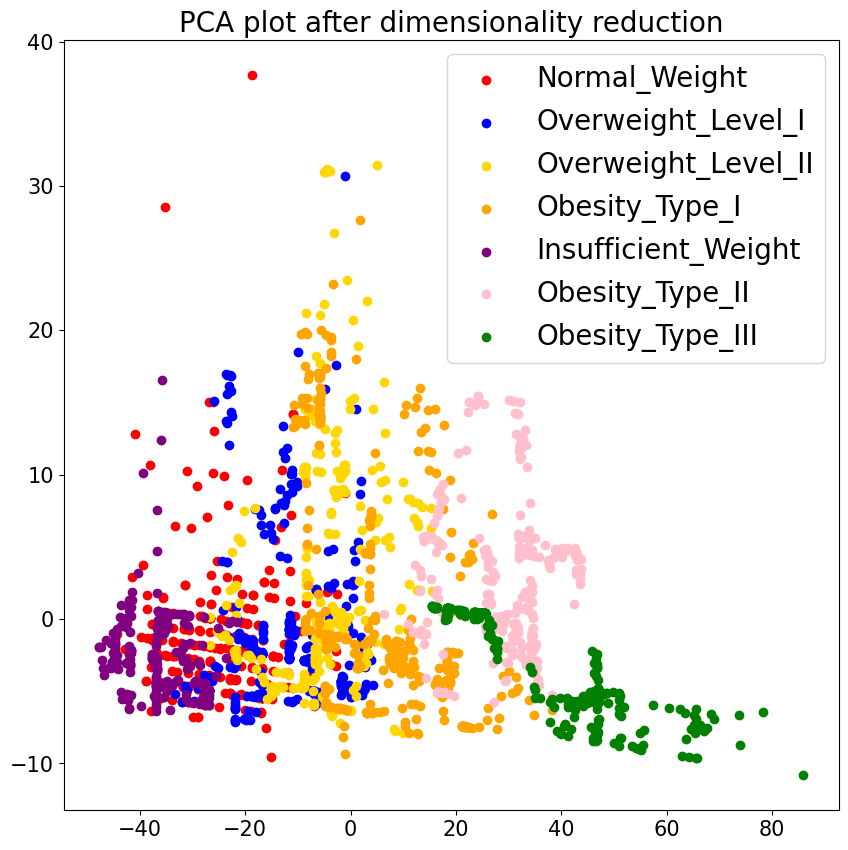

In [119]:
model_pca = PCA(n_components = 2)
data_heat_pca = model_pca.fit_transform(np.array(data_heat))
colors = ["red","blue","gold","orange","purple","pink","green"]
plt.figure(figsize = (10,10))
for i,item in enumerate(data["NObeyesdad"].unique()):
    data_temp = data_heat_pca[data["NObeyesdad"] == item]
    plt.scatter(data_temp[:,0], data_temp[:,1], c = colors[i])
plt.legend(data["NObeyesdad"].unique(), fontsize = 20)
plt.title("PCA plot after dimensionality reduction", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Decision Tree

In [133]:
data1 = data[["Gender","Age","Height","Weight","FAVC","SMOKE","FAF"]]
labels = data["NObeyesdad"]
labels_ = np.unique(labels)
label_enc = LabelEncoder()
labels = label_enc.fit_transform(labels)
data1["Gender"] = data1["Gender"].apply(lambda x:0 if x == "Male" else 1)
data1["FAVC"] = data1["FAVC"].apply(lambda x:0 if x == "no" else 1)
data1["SMOKE"] = data1["SMOKE"].apply(lambda x:0 if x == "no" else 1)
data1

/var/folders/2b/f3n_gpvd0fl99vbmkxp2hzph0000gn/T/ipykernel_21410/4255995915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Gender"] = data1["Gender"].apply(lambda x:0 if x == "Male" else 1)
/var/folders/2b/f3n_gpvd0fl99vbmkxp2hzph0000gn/T/ipykernel_21410/4255995915.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["FAVC"] = data1["FAVC"].apply(lambda x:0 if x == "no" else 1)
/var/folders/2b/f3n_gpvd0fl99vbmkxp2hzph0000gn/T/ipykernel_21410/4255995915.py:8: SettingWithCopyWarning: 
A value

,Gender,Age,Height,Weight,FAVC,SMOKE,FAF
0,1,21.000000,1.620000,64.000000,0,0,0.000000
1,1,21.000000,1.520000,56.000000,0,1,3.000000
2,0,23.000000,1.800000,77.000000,0,0,2.000000
3,0,27.000000,1.800000,87.000000,0,0,2.000000
4,0,22.000000,1.780000,89.800000,0,0,0.000000
...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,0,1.676269
2107,1,21.982942,1.748584,133.742943,1,0,1.341390
2108,1,22.524036,1.752206,133.689352,1,0,1.414209
2109,1,24.361936,1.739450,133.346641,1,0,1.139107


[Text(0.5, 0.875, 'Weight <= 99.536\ngini = 0.856\nsamples = 2111\nvalue = [272, 287, 351, 297, 324, 290, 290]\nclass = Obesity_Type_I'),
 Text(0.25, 0.625, 'Weight <= 60.059\ngini = 0.801\nsamples = 1382\nvalue = [272, 287, 243, 5, 0, 290, 285]\nclass = Overweight_Level_I'),
 Text(0.125, 0.375, 'Height <= 1.66\ngini = 0.482\nsamples = 420\nvalue = [266, 143, 0, 0, 0, 10, 1]\nclass = Insufficient_Weight'),
 Text(0.0625, 0.125, 'gini = 0.537\nsamples = 223\nvalue = [91, 121, 0, 0, 0, 10, 1]\nclass = Normal_Weight'),
 Text(0.1875, 0.125, 'gini = 0.198\nsamples = 197\nvalue = [175, 22, 0, 0, 0, 0, 0]\nclass = Insufficient_Weight'),
 Text(0.375, 0.375, 'Weight <= 76.041\ngini = 0.742\nsamples = 962\nvalue = [6, 144, 243, 5, 0, 280, 284]\nclass = Overweight_Level_II'),
 Text(0.3125, 0.125, 'gini = 0.615\nsamples = 356\nvalue = [6, 126, 4, 0, 0, 176, 44]\nclass = Overweight_Level_I'),
 Text(0.4375, 0.125, 'gini = 0.657\nsamples = 606\nvalue = [0, 18, 239, 5, 0, 104, 240]\nclass = Overweight_

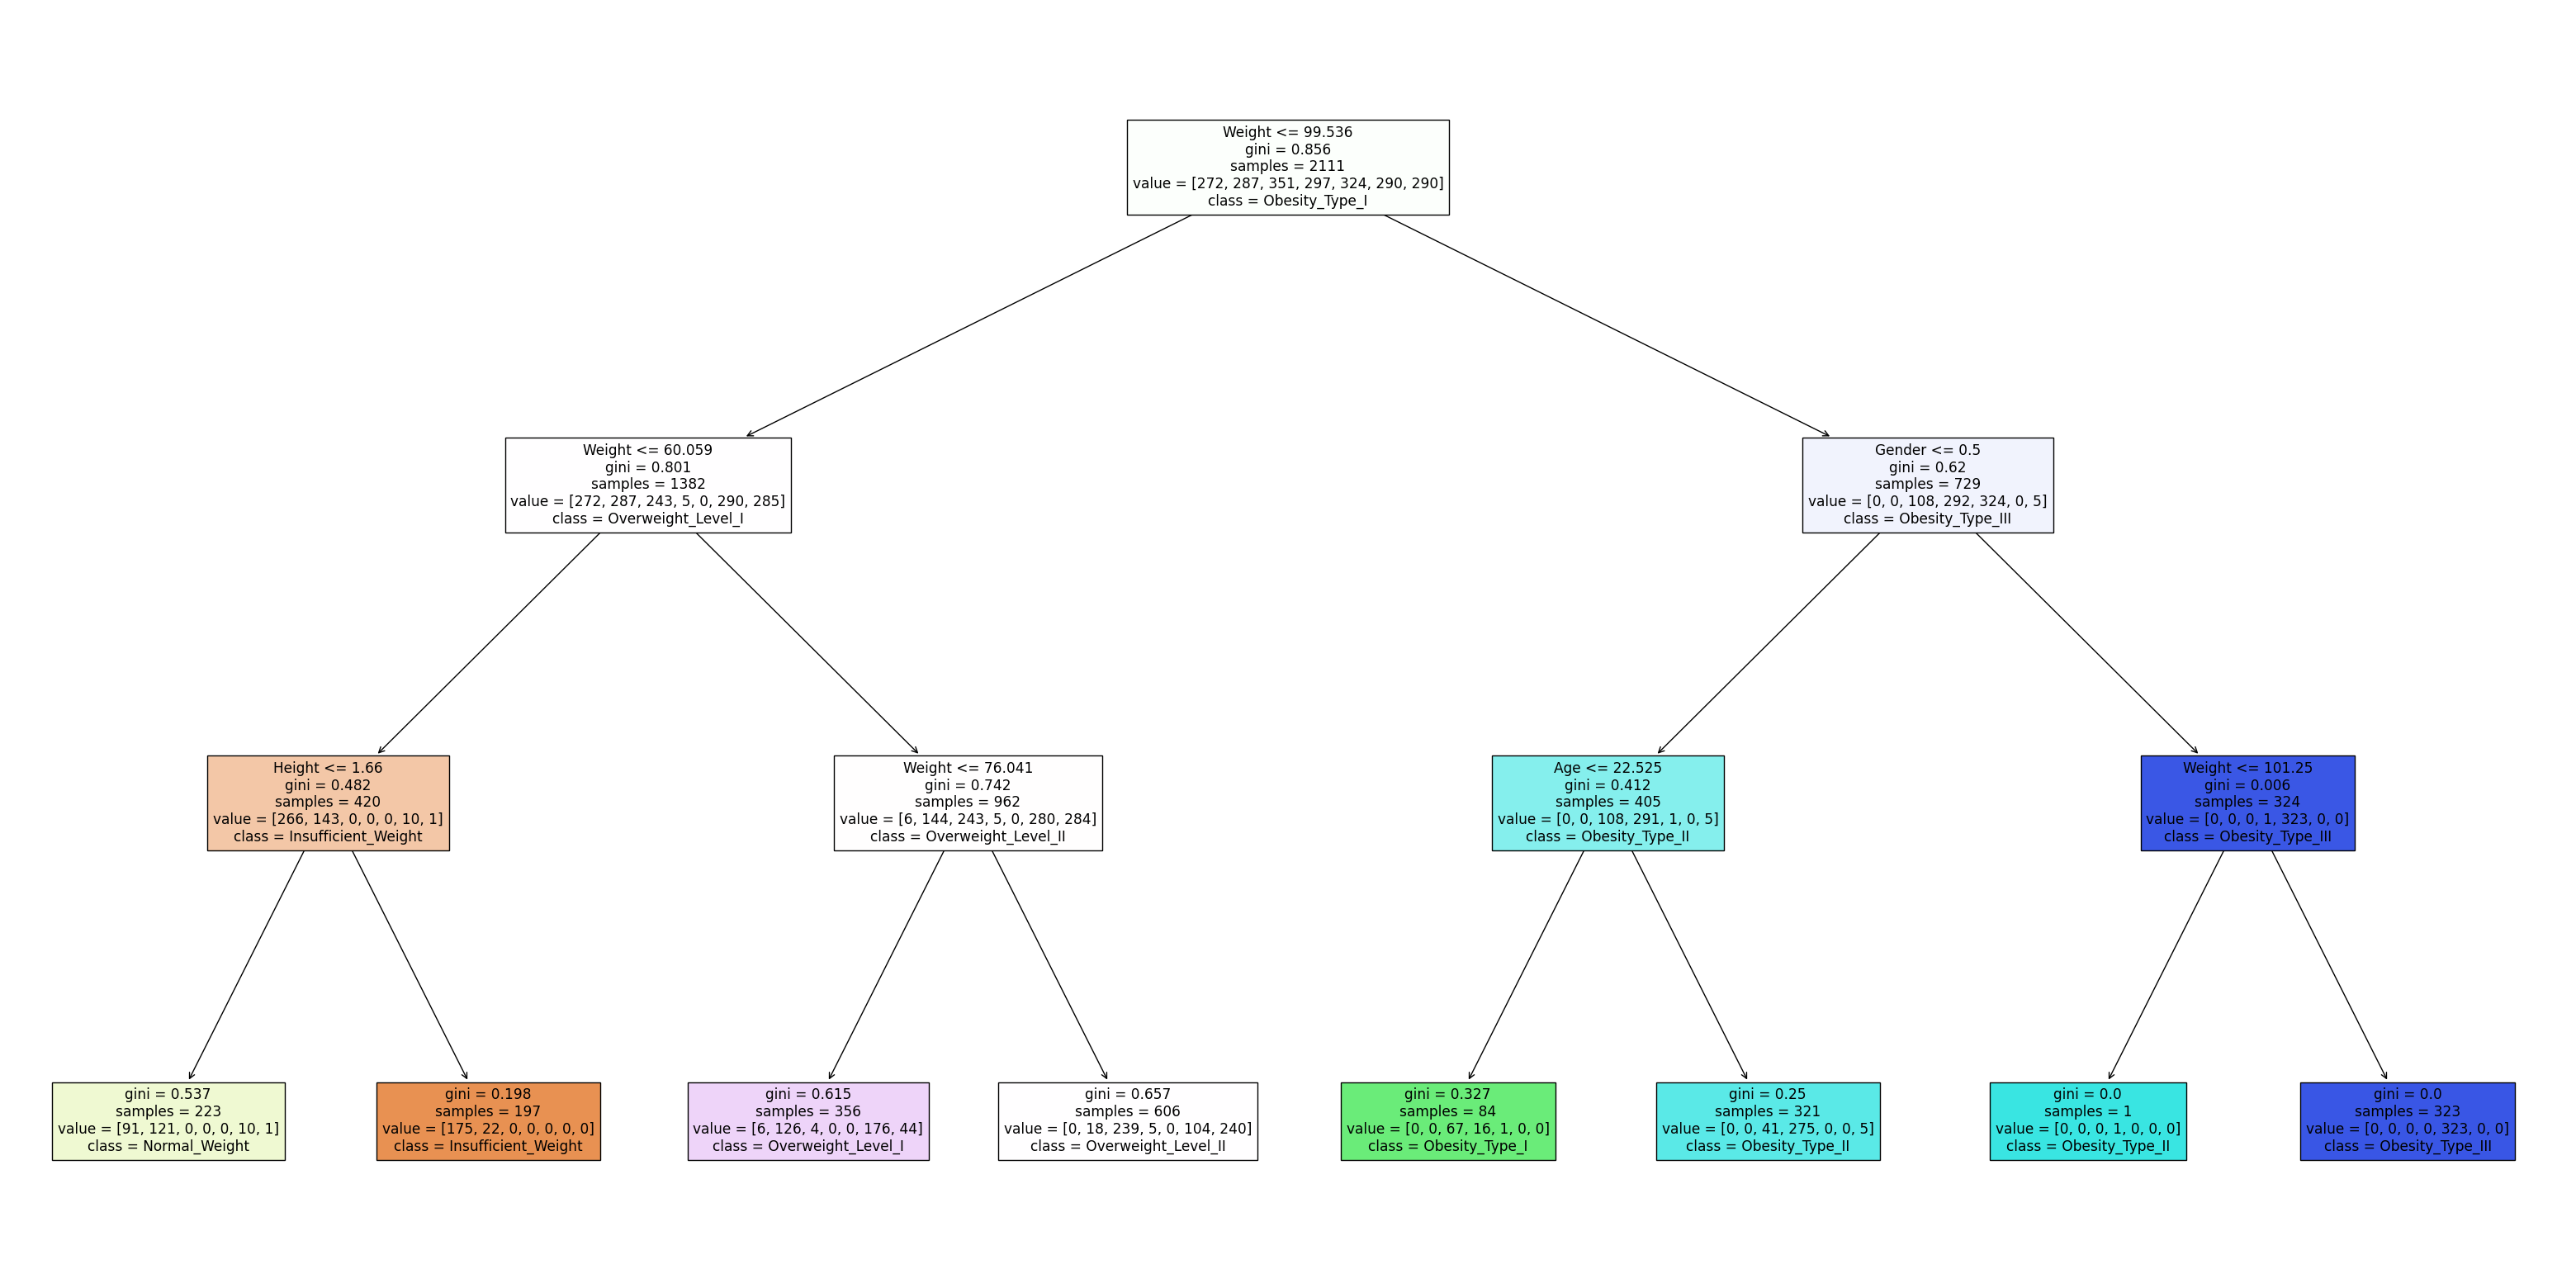

In [145]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(data1, labels)
fig = plt.figure(figsize = (40,20))
plot_tree(model,
    feature_names = data.columns,
    class_names = labels_,
    filled = True
)